<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/PolinomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

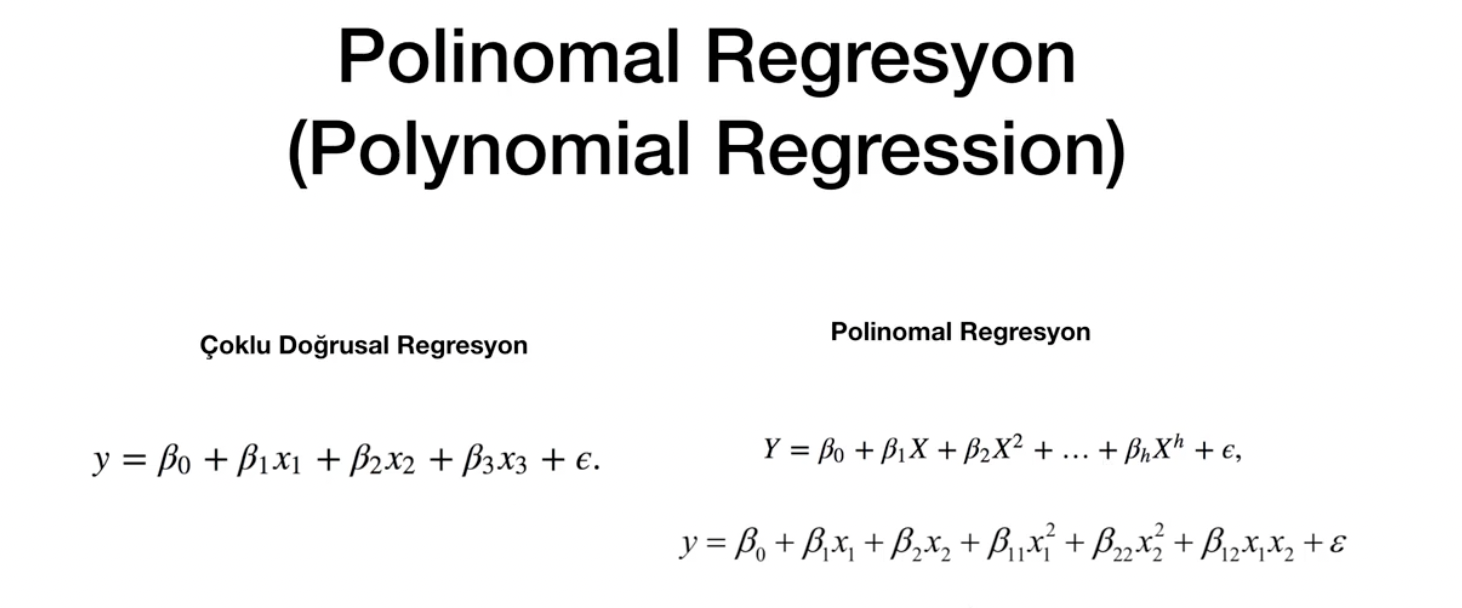

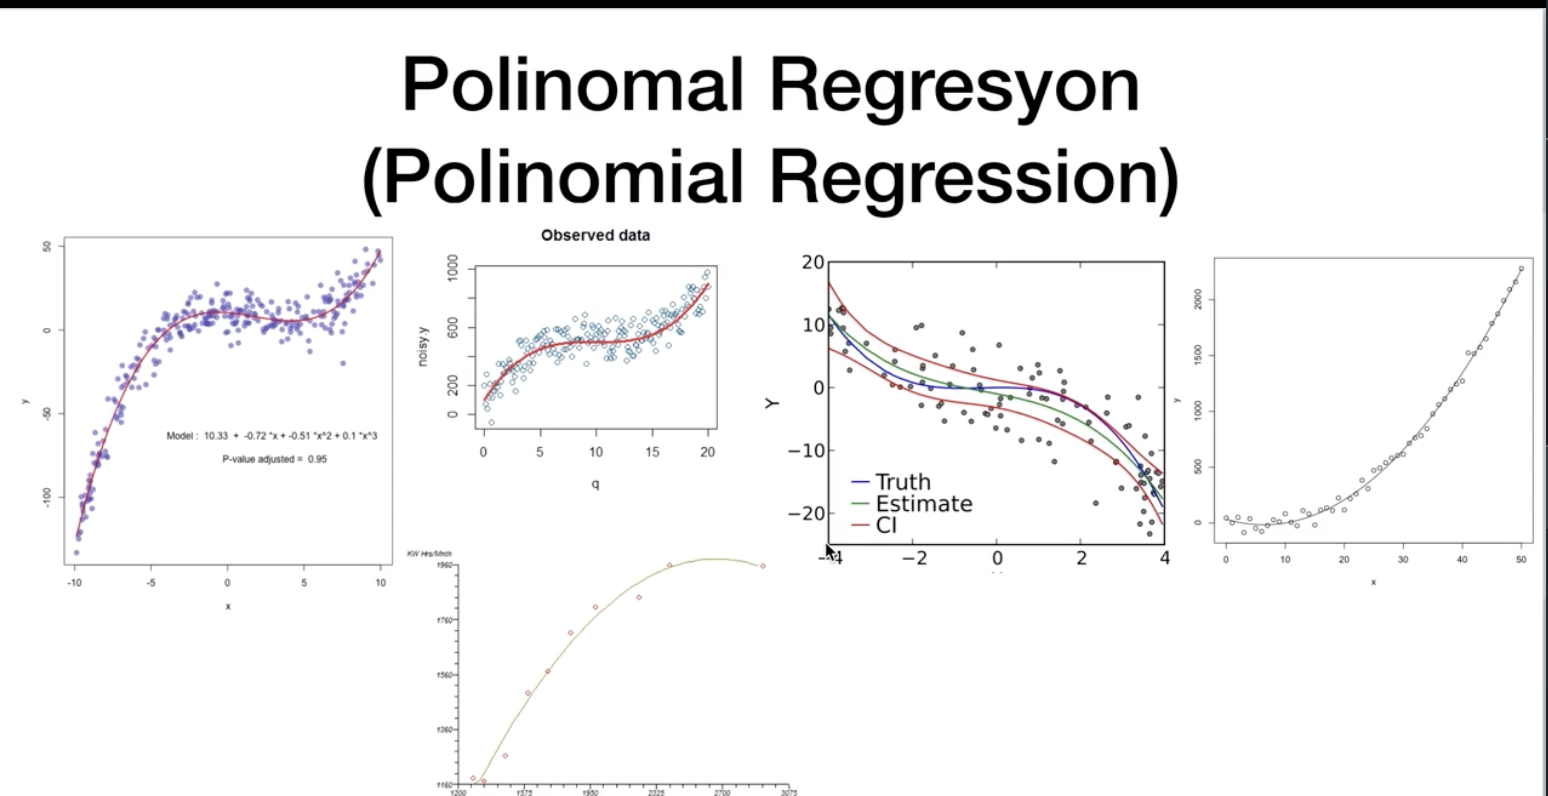

- Amaç yine veri kümesi için en uygun parabolü çizmek.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("maaslar.csv")

In [2]:
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [8]:
# test-train olarak ayırmayıp hepsini tek seferde verelim. Dataset küçük 
x = df.loc[:,["Egitim Seviyesi"]]
y = df.loc[:,["maas"]]

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

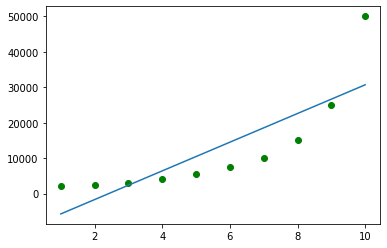

In [13]:
plt.scatter(x,y, color="green")
plt.plot(x,lr.predict(x))

# şekli yorumlamak gerekli
# veriler lineer değil daha çok parabolik artıyor gibi o yüzden parabolik eğitimi deneyelim 

In [16]:
# polReg yapmak için istediğim kadar kuvvet alıp onu lineere uyguluyoruz
# bu örnekte 2.dereceden
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree=2)

x_pol = pol_reg.fit_transform(x)
y_pol = pol_reg.fit_transform(y)
print(x_pol)
print(y_pol)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
[[1.0000e+00 2.2500e+03 5.0625e+06]
 [1.0000e+00 2.5000e+03 6.2500e+06]
 [1.0000e+00 3.0000e+03 9.0000e+06]
 [1.0000e+00 4.0000e+03 1.6000e+07]
 [1.0000e+00 5.5000e+03 3.0250e+07]
 [1.0000e+00 7.5000e+03 5.6250e+07]
 [1.0000e+00 1.0000e+04 1.0000e+08]
 [1.0000e+00 1.5000e+04 2.2500e+08]
 [1.0000e+00 2.5000e+04 6.2500e+08]
 [1.0000e+00 5.0000e+04 2.5000e+09]]


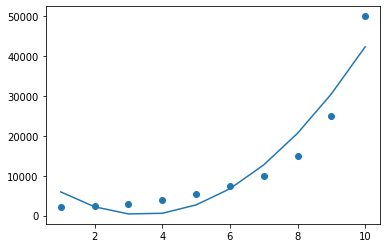

In [20]:
# sonrasında yine lineer tahmin yapıyormuş gibi
# linear regression
lr2 = LinearRegression()
lr2.fit(x_pol,y)
plt.scatter(x,y)

# fit ettiğimiz değerleri sonrasında geri orijinal haline transfrom yapıyoruz
plt.plot(x,lr2.predict(pol_reg.fit_transform(x)))

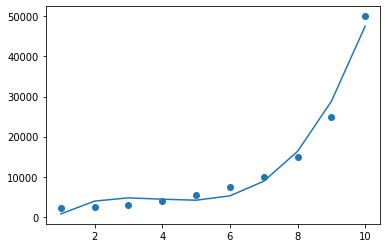

In [24]:
# 3.deredecen yaparsak daha başarılı bir model çıkar
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree=3)

x_pol = pol_reg.fit_transform(x)
y_pol = pol_reg.fit_transform(y)

lr3 = LinearRegression()
lr3.fit(x_pol,y)
plt.scatter(x,y)
plt.plot(x,lr3.predict(pol_reg.fit_transform(x)))